In [1]:
#libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
#import squarify # pip install squarify (algorithm for treemap)&lt;/pre&gt;
import numpy as np
import csv as csv
import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
#from wordcloud import WordCloud


from scipy import stats

from pandas import ExcelWriter
from pandas import ExcelFile
 
from pandas.io.json import json_normalize
#from wordcloud import WordCloud, STOPWORDS

#pandas cheat sheet
#https://www.dataquest.io/blog/pandas-cheat-sheet/

# Pandas - Read in Excel File and each individual tab of data

df1 = pd.read_excel('C:/Users/e5553468/Desktop/Python/KnuggetData_365.xlsx', sheet_name='Data')
#df2 = pd.read_excel('C:/Users/e5553468/Desktop/Python/Knugget_Data_0529.xlsx', sheet_name='Data Management') 
#df3 = pd.read_excel('C:/Users/e5553468/Desktop/Python/Knugget_Data_0529.xlsx', sheet_name='Data Governance')    
    
#df4 = pd.concat([df1,df2,df3])
pop_docs = df1.drop_duplicates()
print("Data Set Columns:")
print(pop_docs.columns)
print("Data Set Dimensions:")
print(pop_docs.shape)

Data Set Columns:
Index(['Owner Name', 'Uploader Name', 'Download Restricted', 'Title', 'Type',
       'Creation Date', 'Extension', 'Whitelabel', 'Number Views',
       'Number Likes', 'Tags', 'Project Code', 'Hyperlinks'],
      dtype='object')
Data Set Dimensions:
(1906, 13)


In [2]:
### Separate Tags to Individual Rows, linked to Titles ###

df2 = pd.read_excel('C:/Users/e5553468/Desktop/Python/Knugget365_tags.xlsx') 
df2.columns

df3 = df2[['Title','Tags']]
df3.head(5)

df3 = df3.applymap(str)
df3.columns

a = pd.DataFrame(df3.Tags.str.split(',').tolist(), index=df3.Title).stack()
a = a.reset_index()[[0, 'Title']] # var1 variable is currently labeled 0
a.columns = ['Tags', 'Title'] # renaming var1
a.head(5)


,Tags,Title
0,Technology,The marketing measurement and insight playbook...
1,Investment,The marketing measurement and insight playbook...
2,Performance Management,The marketing measurement and insight playbook...
3,Forrester Research,The marketing measurement and insight playbook...
4,Cross-Industry,The marketing measurement and insight playbook...


In [3]:
### SAVE FILE WITH UNIQUE TAGS ###

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('knugget365_analysis.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
a.to_excel(writer, index=False, sheet_name='tagsplitfinal')
#tagsplit.to_excel(writer, sheet_name='tagsplit')
df1.to_excel(writer, sheet_name='pop docs')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [4]:
### EXCEL MANUAL TAGGING AND CATEGORIZING WITH V-LOOKUPS. ###
### LOAD FILES BACK IN ONCE TAGS ARE COMPLETE BEFORE MERGING WITH NEW DATA SET ###

df10 = pd.read_excel('C:/Users/e5553468/Desktop/Python/Knugget365_analysis.xlsx', sheet_name ='tagsplitfinal')
df10.columns = ['Unique Tags', 'Title', 'Category']
df10.head()

#df10.columns

,Unique Tags,Title,Category
0,Technology,The marketing measurement and insight playbook...,TOPIC
1,Investment,The marketing measurement and insight playbook...,LOB
2,Performance Management,The marketing measurement and insight playbook...,0
3,Forrester Research,The marketing measurement and insight playbook...,VENDOR
4,Cross-Industry,The marketing measurement and insight playbook...,TOPIC


In [6]:
# join by _common_ columns: `col1`, `col3`

df11 = pd.read_excel('C:/Users/e5553468/Desktop/Python/pop_docs.xlsx', sheet_name ='pop docs')
df11.shape

#df12 = pd.merge(df10, df11, on=['Title'])
df12 = pd.merge(df10, df11, how='left', on=['Title'])
# join by: `df1.col1 == df2.index`
#df12 = pd.merge(df10, df11, left_on='Title')
df12.head(5)

,Unique Tags,Title,Category,Owner Name,Uploader Name,Download Restricted,Type,Creation Date,Extension,Whitelabel,Number Views,Number Likes,Tags,Project Code,Hyperlinks
0,Technology,The marketing measurement and insight playbook...,TOPIC,miroslav koller,miroslav koller,True,External Report,2018-02-08,pdf,White-Label N/A,1,0,"Technology, Investment, Performance Management...",NaN,https://knugget.capco.com/knowledge/5a7c5e51f9...
1,Investment,The marketing measurement and insight playbook...,LOB,miroslav koller,miroslav koller,True,External Report,2018-02-08,pdf,White-Label N/A,1,0,"Technology, Investment, Performance Management...",NaN,https://knugget.capco.com/knowledge/5a7c5e51f9...
2,Performance Management,The marketing measurement and insight playbook...,0,miroslav koller,miroslav koller,True,External Report,2018-02-08,pdf,White-Label N/A,1,0,"Technology, Investment, Performance Management...",NaN,https://knugget.capco.com/knowledge/5a7c5e51f9...
3,Forrester Research,The marketing measurement and insight playbook...,VENDOR,miroslav koller,miroslav koller,True,External Report,2018-02-08,pdf,White-Label N/A,1,0,"Technology, Investment, Performance Management...",NaN,https://knugget.capco.com/knowledge/5a7c5e51f9...
4,Cross-Industry,The marketing measurement and insight playbook...,TOPIC,miroslav koller,miroslav koller,True,External Report,2018-02-08,pdf,White-Label N/A,1,0,"Technology, Investment, Performance Management...",NaN,https://knugget.capco.com/knowledge/5a7c5e51f9...


In [7]:
### CARVE OUT DOCUMENTS WITH EXTERNAL REPORTS AS THEY ARE SKEWING DATA ANALYSIS DUE TO VOLUME ###
### create filter for pivots and charts ###

internalonly = df12[df12.Type != "External Report"]
internalonly = internalonly.rename(columns={'Unique Tags': 'Uniquetags'})
internalonly.shape
internalonly.columns

inttopics = internalonly[(internalonly.Category == "TOPIC")] 
inttopicss = inttopics[(inttopics.Uniquetags == "WM")]

In [8]:
topcred = pd.pivot_table(inttopics,index=["Category","Uniquetags","Type","Title","Hyperlinks", "Owner Name"])
topcred

Download Restricted  \
Category Uniquetags                  Type           Title                                              Hyperlinks                                         Owner Name                                  
TOPIC    API                         Article        Application programming interface (API)            https://knugget.capco.com/knowledge/5afae0553f5... laure lemercinier                   False   
                                                    CA Technologies - Five pillars of API Management   https://knugget.capco.com/knowledge/5afad7e8a02... laure lemercinier                   False   
                                                    CA Technologies - Five simple strategies for se... https://knugget.capco.com/knowledge/5afad86d3f5... laure lemercinier                   False   
                                                    CA Technologies - The API Management Playbook      https://knugget.capco.com/knowledge/5afad9033f5... laure lemercinier                   False   
                                     Books          API for Dummies                                    https://knugget.capco.com/knowledge/5b06c1323f1... laure lemercinier                   False   
                                                    Soat - Web API (livre blanc)                       https://knugget.capco.com/knowledge/5afaf3203f5... laure lemercinier                   False   
         ATM                         Training Guide MindCap - The future of Chatbots                   https://knugget.capco.com/knowledge/5ac36d3e82f... celina hohmann                      False   
                                     Worked Example Capco Asset Management Capabilities - WIM Wealt... https://knugget.capco.com/knowledge/5abca9aeaab... yves delwaulle                      False   
         Agile                       Article        Tech Support Management Processes 20161216         https://knugget.capco.com/knowledge/586bce2a890... wayne thomas                        False   
                                     Credential     Capco Credential - Euronext CIO Advisory           https://knugget.capco.com/knowledge/59146dbd78b... franÃ§ois bourcier                  False   
                                                    Fannie Mae ILE Project Credential                  https://knugget.capco.com/knowledge/587f7bda997... poorna bhimavarapu                  False   
                                                    LDNG - Capco Qual Final                            https://knugget.capco.com/knowledge/58e26ace469... poorna bhimavarapu                  False   
                                                    RBC Caribbean Digital Modernization                https://knugget.capco.com/knowledge/5911d85c78b... mike lee                            False   
                                                    Scotiabank Project Intake Tool Credential          https://knugget.capco.com/knowledge/594d65c9704... nebojsa cukilo                      False   
         Anti-Money Laundering (AML) Credential     5027950 - KYC screening for periodic reviews       https://knugget.capco.com/knowledge/58be84dfd77... marina iozef                        False   
                                                    KYC screening for periodic reviews                 https://knugget.capco.com/knowledge/58a40f870e9... neha bhatia                         False   
                                     Training Guide RADAR RegTech_CheatSheet                           https://knugget.capco.com/knowledge/594002bdcd5... danushka jayasinghe                 False   
         Architecture                Capco POV      Payment Utility Architecture                       https://knugget.capco.com/knowledge/59184214597... stefan heftberger                   False   
                                                    Payments Architecture Best Practice                https://knugget.capco.com/knowledge/591843e4597... stefan heftberger                   False 

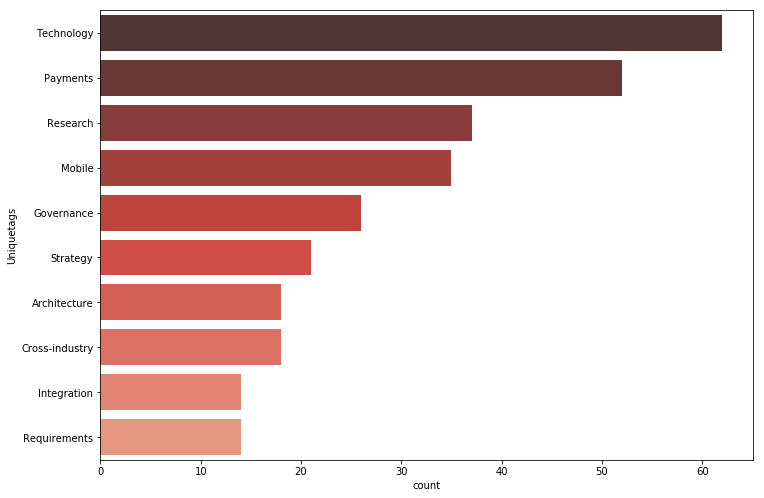

In [11]:
### VIEW OF TOP TOPICS IN THE CREDENTIAL DOCUMENT TYPE ###
#plot

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(y="Uniquetags", data= inttopics, palette="Reds_d", ax=ax, order=pd.value_counts(inttopics['Uniquetags']).iloc[:10].index)
plt.savefig('Unique Tags.png')

In [12]:
owner = pd.pivot_table(inttopics,index=["Owner Name"])
owner

,Download Restricted,Number Likes,Number Views
Owner Name,,,
alex crump,0.000000,0.000000,58.000000
alex yu,0.000000,0.000000,10.000000
"alexander croonen, cfa",0.000000,0.000000,5.000000
alexander kuebler,0.000000,0.000000,31.000000
amit mehta,0.000000,0.000000,50.000000
amol rawate,0.000000,0.000000,32.000000
anand inbasekaran,0.000000,0.666667,46.000000
andreas andersen,0.000000,0.000000,33.000000
andrei geaba,0.000000,0.000000,4.000000


In [ ]:
### Need to put in multiple pivot tables.
### Global view into documents.
### Summary of actual documents.

